## Calcule scientifiques avec scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (1) Interpolation

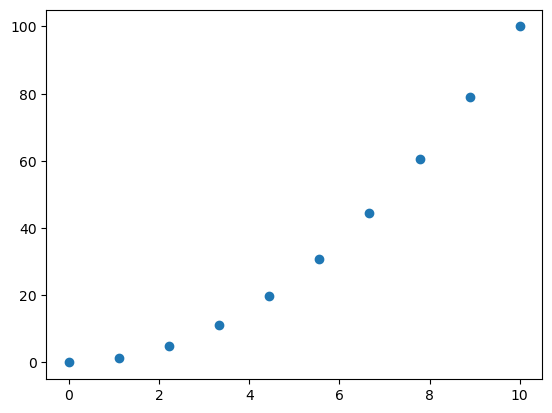

In [2]:
x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)

In [3]:
from scipy.interpolate import interp1d

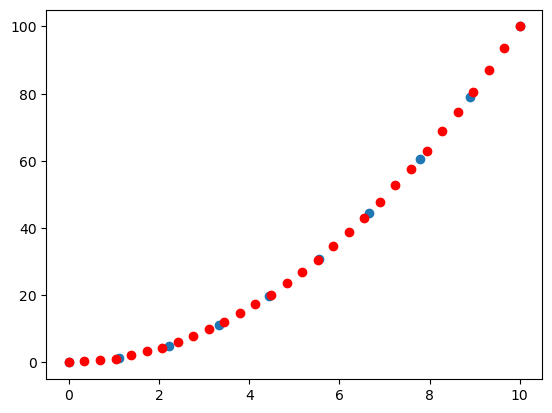

In [5]:
f = interp1d(x,y, kind = 'linear')

new_x = np.linspace(0,10,30)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x, result, c= 'r')

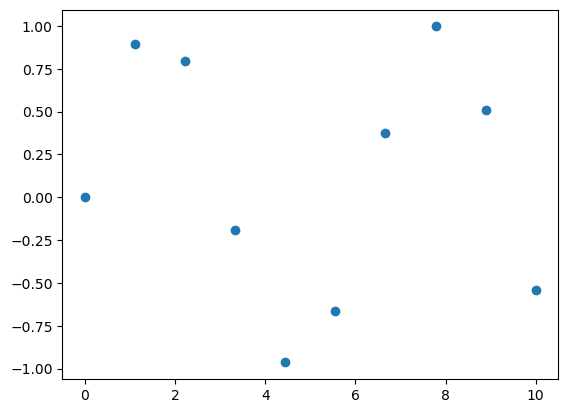

In [6]:
x = np.linspace(0,10,10)
y = np.sin(x)
plt.scatter(x,y)

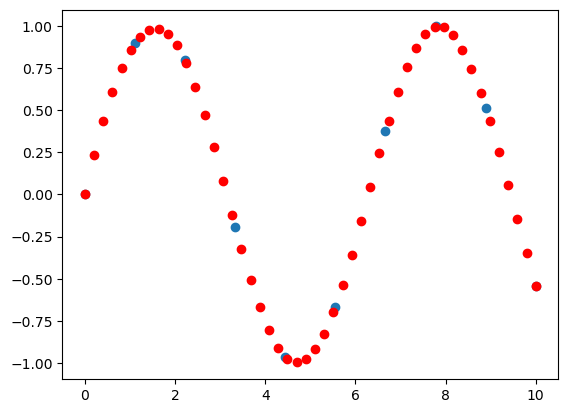

In [8]:
f = interp1d(x,y, kind = 'cubic')

new_x = np.linspace(0,10,50)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x, result, c= 'r')

## (2) Optimization

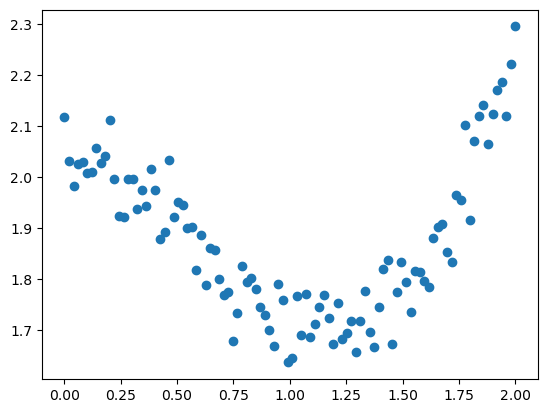

In [11]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [12]:
def f(x,a,b,c,d):
    return a*x**3 + b*x**2 + c *x + d

In [13]:
from scipy import optimize

In [15]:
params, param_cov = optimize.curve_fit(f, x,y)

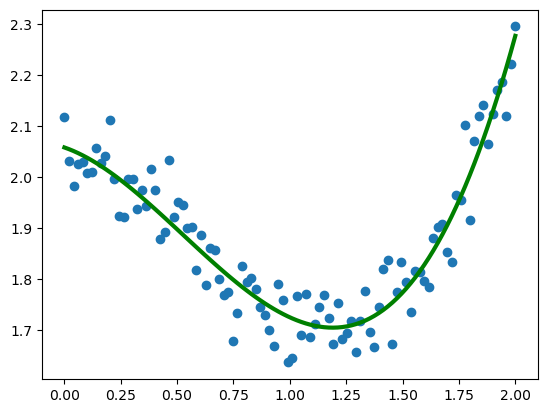

In [16]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw =3)

## Minimize

In [17]:
def f(x):
    return x**2 + 15*np.sin(x)

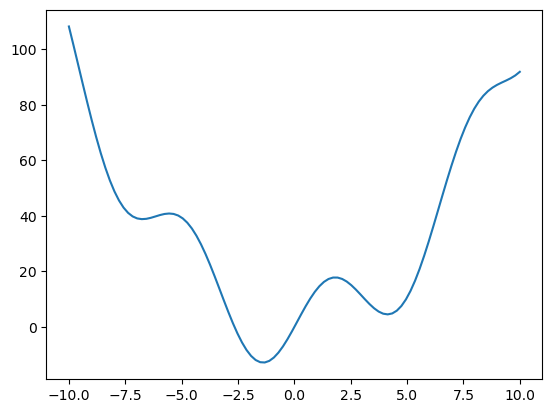

In [18]:
x = np.linspace(-10,10,100)
plt.plot(x, f(x))

In [22]:
x0 = -5
results = optimize.minimize(f, x0 = x0).x

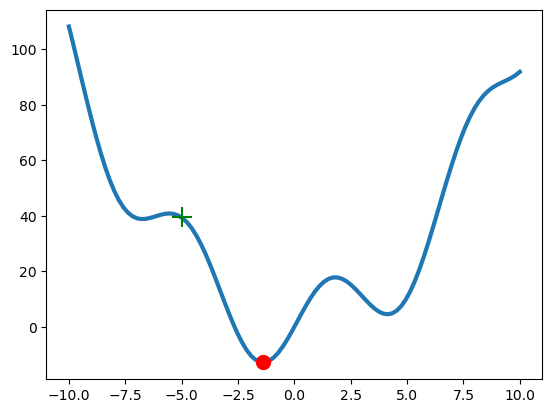

In [23]:
plt.plot(x,f(x), lw=3, zorder = -1)
plt.scatter(results, f(results), s =100, c= 'r', zorder = 1)
plt.scatter(x0, f(x0), s = 200, marker = '+', c = 'g' ,zorder = 1)
plt.show()

In [24]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0] + x[1])*np.cos(x[0])

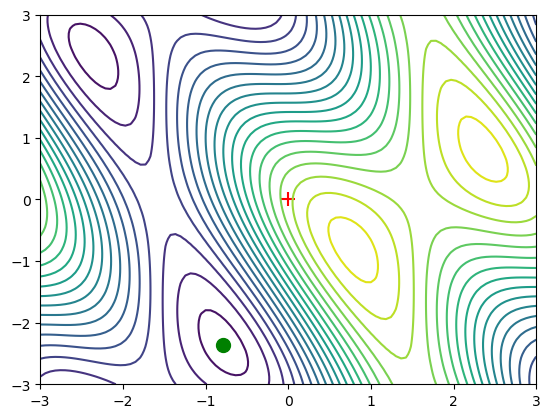

In [45]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

x,y = np.meshgrid(x,y)
plt.contour(x,y, f(np.array([x,y])), 20)

x0 = np.zeros((2,1))
plt.scatter(x0[0],x0[1], marker = '+', c = 'r', s = 100)

result = optimize.minimize(f, x0= [0,0]).x

plt.scatter(result[0], result[1], c = 'g' , s =100)

## (3) Traitement du signal

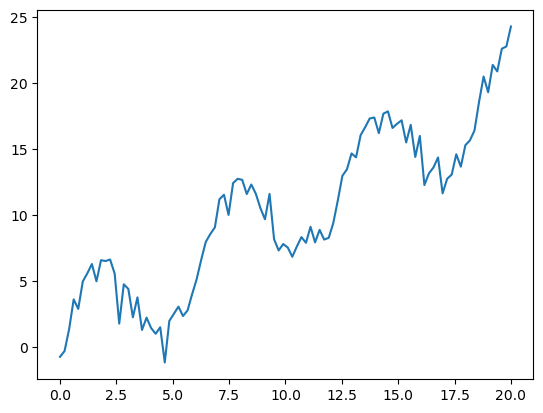

In [46]:
x = np.linspace(0,20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

In [47]:
from scipy import signal

In [48]:
new_y = signal.detrend(y)

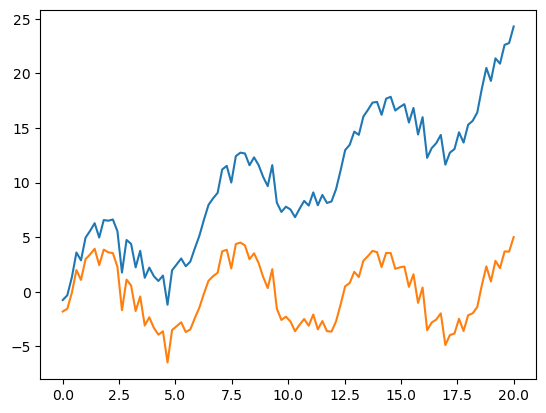

In [49]:
plt.plot(x,y)
plt.plot(x, new_y)

## Scipy fourier

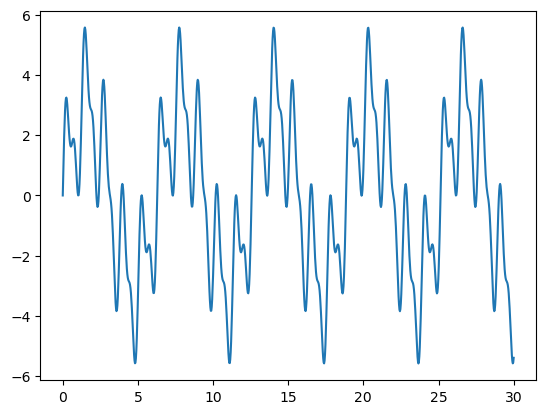

In [50]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)

In [51]:
from scipy import fftpack

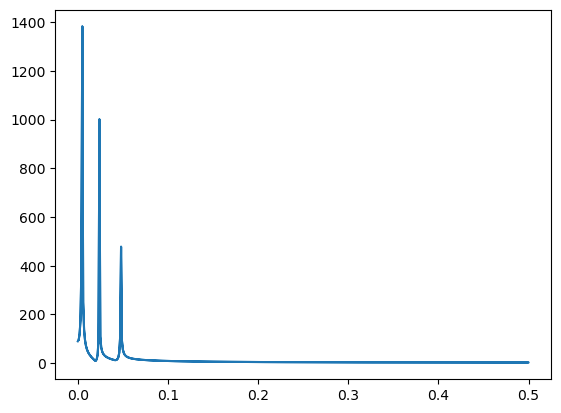

In [53]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequence = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequence), power)

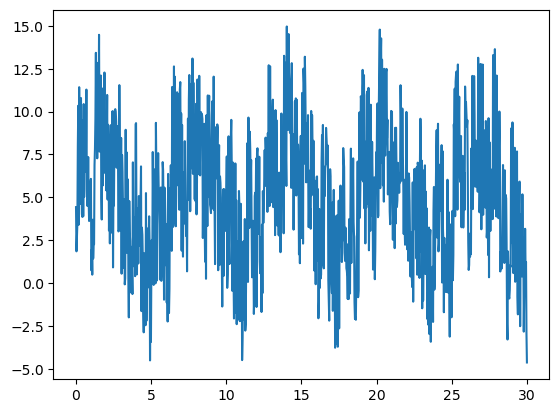

In [61]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

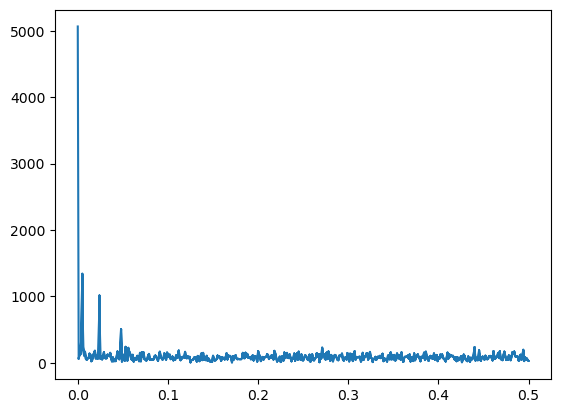

In [76]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequence = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequence), power)

In [77]:
fourier[power<400] = 0

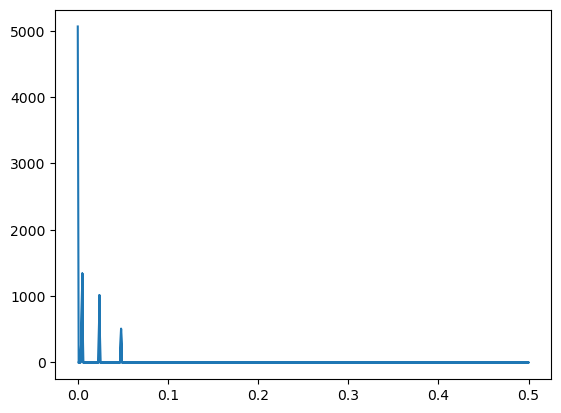

In [78]:
plt.plot(np.abs(frequence),  np.abs(fourier))

In [79]:
filtered_signal = fftpack.ifft(fourier)

C:\Users\benib\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


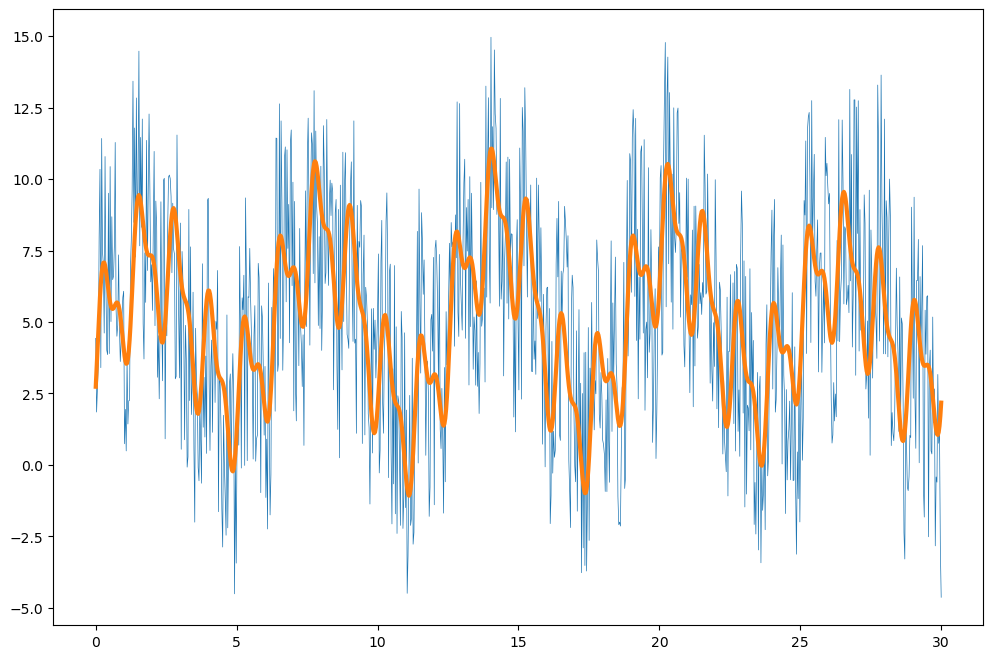

In [81]:
plt.figure(figsize = (12,8))
plt.plot(x,y, lw = 0.5)
plt.plot(x, filtered_signal, lw = 3)
plt.show()

## (4) Traitement d'image

## ndimage

In [82]:
from scipy import ndimage

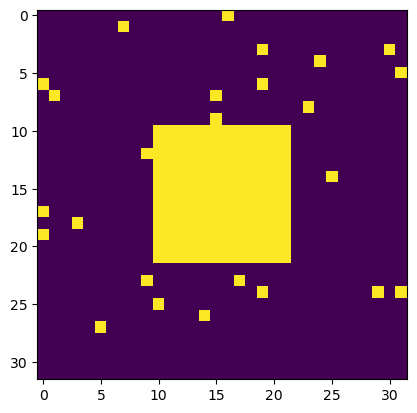

In [83]:
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30), np.random.randint(0,32,30)] = 1
plt.imshow(X)

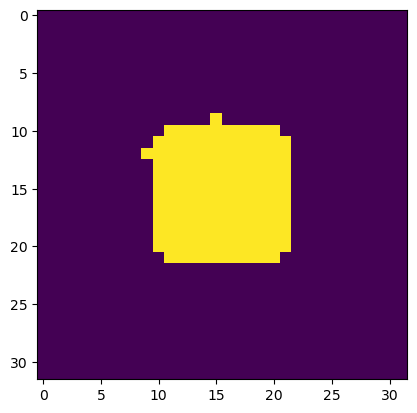

In [85]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

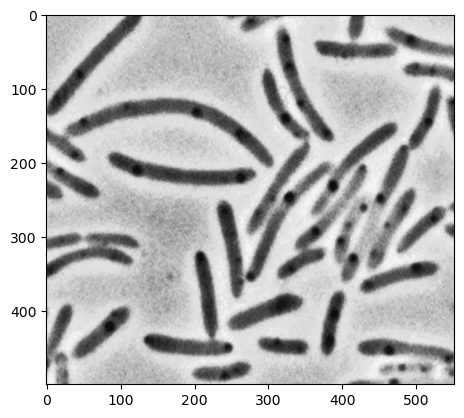

In [91]:
image = plt.imread('bacteria.png')
image = image[:,:,0]
plt.imshow(image, cmap = 'gray')
#image.shape

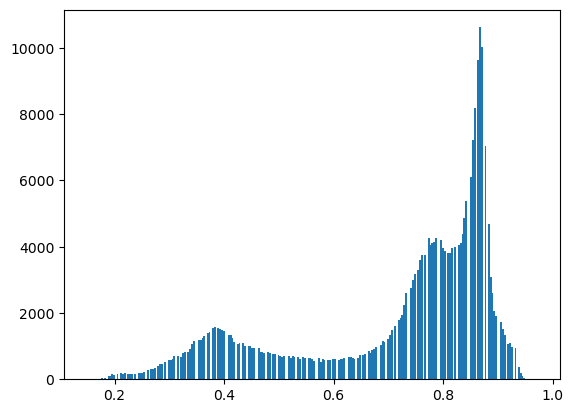

In [93]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins = 255)
plt.show()

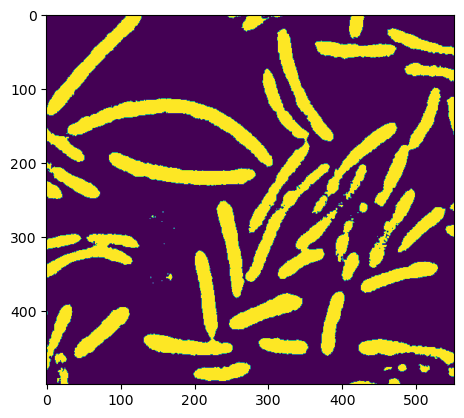

In [94]:
image = image<0.6
plt.imshow(image)

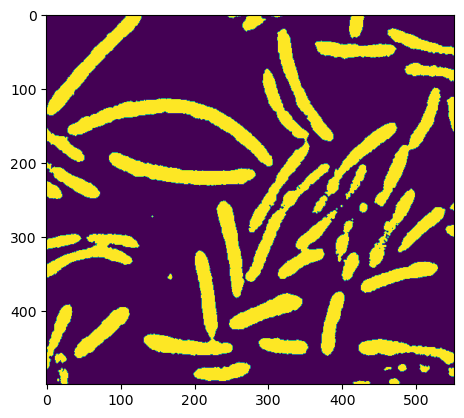

In [95]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [97]:
label_image , n_label = ndimage.label(open_x)
print(n_label)

56


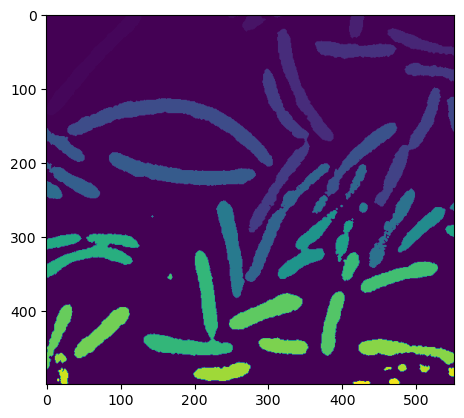

In [98]:
plt.imshow(label_image)

In [99]:
sizes = ndimage.sum(open_x , label_image , range(n_label))

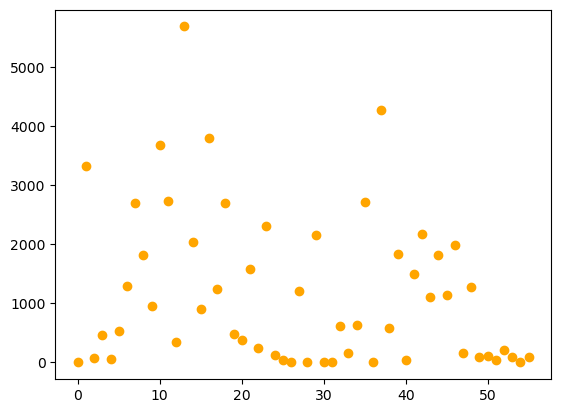

In [100]:
plt.scatter(range(n_label), sizes, c = 'orange')